## Import Modules and Libraries

In [5]:
!pip install image-classifiers

In [6]:
pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-9133nn_q
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-9133nn_q
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-m4ugy_li/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [0]:
import keras
from classification_models.resnet import ResNet18, preprocess_input

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys
from google.colab.patches import cv2_imshow
import random

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, SpatialDropout2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

## Import CiFAR Dataset
- It is a more advance dataset compared to MNIST
- It has 10 classes 
- The dimension of the images are 32x32x3 since it is a RGB image
- Shown below are the classses in the CiFAR dataset
- Like MNIST, CiFAR also has 50K training images and labels as well as 10K test images and labels

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

## Print training data dimensions

In [63]:
print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


## Displaying a sample from each class of the dataset

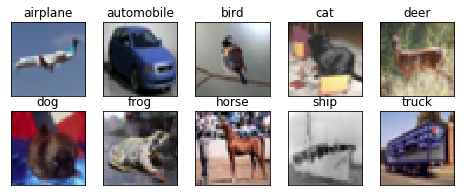

In [64]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

## Data Float Conversion , remapping pixel values between 0 & 1, and One-Hot encoding

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## ResNet-18 Model Architecture
- Model is trained on Imagenet dataset
- Model is modified to be use for Cifar-10 dataset


In [20]:
X = preprocess_input(train_features)
y = train_labels

n_classes = 10

# build model
base_model = ResNet18(input_shape=(32,32,3), weights='imagenet', include_top=False)
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])

# train
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=10, validation_data = (test_features, test_labels))

A local file was found, but it seems to be incomplete or outdated because the md5 file hash does not match the original value of 318e3ac0cd98d51e917526c9f62f0b50 so we will re-download the data.
44924928/44920640 [==============================] - 1s 0us/step


W0719 16:36:59.530934 139795787450240 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 115s 2ms/step - loss: 1.0087 - acc: 0.6545 - val_loss: 0.7409 - val_acc: 0.7394
Epoch 2/10
50000/50000 [==============================] - 107s 2ms/step - loss: 0.6414 - acc: 0.7771 - val_loss: 0.6296 - val_acc: 0.7802
Epoch 3/10
50000/50000 [==============================] - 108s 2ms/step - loss: 0.5041 - acc: 0.8245 - val_loss: 0.6036 - val_acc: 0.7938
Epoch 4/10
50000/50000 [==============================] - 108s 2ms/step - loss: 0.4054 - acc: 0.8569 - val_loss: 0.5849 - val_acc: 0.8070
Epoch 5/10
50000/50000 [==============================] - 108s 2ms/step - loss: 0.3226 - acc: 0.8869 - val_loss: 0.6587 - val_acc: 0.7985
Epoch 6/10
50000/50000 [==============================] - 108s 2ms/step - loss: 0.2550 - acc: 0.9108 - val_loss: 0.6297 - val_acc: 0.8127
Epoch 7/10
50000/50000 [==============================] - 109s 2ms/step - loss: 0.2005 - acc: 0.9293 - val_loss: 0.6805 - 

### Model Summary

In [38]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_109 (ZeroPadding (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_109[0][0]         
__________________________________________________________________________________________________
bn0 (Batch

### Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### Save/Load Model from Drive

In [0]:
from keras.models import load_model

filepath="/content/gdrive/My Drive/Colab Notebooks/resnet-18_imgnet.hdf5"

model.save(filepath)
# model = load_model(filepath)

### Evaluate Model

In [22]:
score = model.evaluate(test_features, test_labels, verbose=1)
print(score)

10000/10000 [==============================] - 6s 593us/step
[0.750998669886589, 0.8121]


### Predictions

In [23]:
predicted_results = model.predict(test_features)
print(len(predicted_results), "Predicted Classes")

print(predicted_results)

10000 Predicted Classes
[[3.3571124e-09 8.7097964e-09 5.0318782e-10 ... 2.3004876e-07
  5.4022392e-10 2.2197879e-09]
 [6.6250209e-03 5.0010240e-01 2.1332385e-09 ... 4.7628092e-08
  4.9327111e-01 5.6413796e-07]
 [1.2261494e-02 7.9295862e-01 3.8321824e-07 ... 2.9607770e-06
  1.9461590e-01 1.5600029e-04]
 ...
 [5.7993912e-08 1.3285039e-08 1.0198820e-05 ... 3.8665800e-07
  2.4298507e-07 2.4506338e-08]
 [1.1598020e-02 9.8313946e-01 3.7648195e-05 ... 9.3676357e-07
  4.2951771e-07 3.8210368e-05]
 [1.6187447e-09 3.9076795e-08 5.9573557e-07 ... 9.8887050e-01
  2.2803501e-09 1.0935565e-09]]


### Rounding-off Predictions

In [24]:
# Rounding off values for one-hot vector
predicted_results = np.round(predicted_results[:])

print(predicted_results[0])
print(test_labels[0])

10000 Predicted Classes
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


### Correct and Misclassified Image Indexes

In [0]:
correct_indices = []
incorrect_indices = []

for i in range(len(predicted_results)):
  if np.argmax(test_labels[i]) == np.argmax(predicted_results[i]):
    correct_indices.append(i)
  else:
    incorrect_indices.append(i)

In [26]:
print(len(correct_indices)," classified correctly") 
print(len(incorrect_indices)," classified incorrectly")

8052  classified correctly
1948  classified incorrectly


### Misclassified Images Index

In [27]:
print(incorrect_indices)

[1, 2, 12, 15, 20, 24, 26, 35, 42, 51, 52, 57, 58, 59, 61, 63, 74, 76, 78, 85, 86, 87, 97, 112, 118, 125, 128, 129, 139, 143, 147, 148, 162, 167, 169, 171, 178, 184, 188, 221, 226, 228, 232, 237, 247, 248, 255, 256, 258, 262, 265, 271, 277, 279, 284, 287, 293, 302, 306, 309, 310, 312, 316, 324, 325, 327, 352, 354, 355, 356, 357, 368, 377, 378, 384, 385, 388, 393, 399, 403, 405, 407, 416, 417, 422, 427, 428, 431, 433, 438, 450, 455, 457, 458, 459, 464, 477, 480, 483, 485, 488, 497, 518, 525, 528, 531, 532, 541, 551, 563, 567, 569, 577, 598, 601, 606, 617, 623, 627, 637, 640, 641, 645, 665, 671, 672, 674, 675, 682, 685, 690, 692, 697, 710, 717, 721, 725, 727, 730, 735, 736, 739, 744, 746, 749, 751, 766, 770, 773, 774, 775, 787, 788, 793, 796, 802, 804, 807, 810, 811, 817, 825, 836, 837, 853, 860, 866, 877, 882, 883, 888, 889, 893, 900, 912, 925, 932, 933, 938, 941, 943, 953, 956, 957, 960, 965, 966, 969, 972, 982, 993, 994, 1007, 1012, 1019, 1032, 1034, 1035, 1042, 1047, 1049, 1050, 1051

### 50 Misclassified Samples

In [141]:
incorrect_index_50 = incorrect_indices[:50]

print(incorrect_index_50)

[1, 2, 12, 15, 20, 24, 26, 35, 42, 51, 52, 57, 58, 59, 61, 63, 74, 76, 78, 85, 86, 87, 97, 112, 118, 125, 128, 129, 139, 143, 147, 148, 162, 167, 169, 171, 178, 184, 188, 221, 226, 228, 232, 237, 247, 248, 255, 256, 258, 262]


### GradCam Function

In [0]:
def viz(input_img, layer_name, channel_number):
  x = image.img_to_array(input_img)
  x = preprocess_input(x)
  x = np.expand_dims(x, axis=0)
  
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer(layer_name)
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(channel_number):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  
  heatmap = cv2.resize(heatmap, (input_img.shape[1], input_img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  heatmap = np.asarray(heatmap, np.float32)
  
  input_img = input_img * 255
  input_img = np.clip(input_img, 0, 255)

  superimposed_img = cv2.addWeighted(input_img, 0.6, heatmap, 0.4, 0)
  
  return superimposed_img

### Function to Display Images
- This function is used for debugging purposes

In [0]:
def disp(x):
  x = cv2.resize(x, (200,200))
  cv2_imshow(x)

### Debugging

In [0]:
# img = test_features[2]

# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)

# preds = model.predict(x)
# class_idx = np.argmax(preds[0])
# class_output = model.output[:, class_idx]
# last_conv_layer = model.get_layer("stage1_unit2_conv2")

# grads = K.gradients(class_output, last_conv_layer.output)[0]
# pooled_grads = K.mean(grads, axis=(0, 1, 2))
# iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
# pooled_grads_value, conv_layer_output_value = iterate([x])
# for i in range(64):
#     conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
# heatmap = np.mean(conv_layer_output_value, axis=-1)
# heatmap = np.maximum(heatmap, 0)
# heatmap /= np.max(heatmap)

# heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
# heatmap = np.uint8(255 * heatmap)
# heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
# heatmap = np.asarray(heatmap, np.float32)
# img = img * 255
# img = np.clip(img, 0,255)
# superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

# disp(superimposed_img)

### Plot of misclassified images with GradCam

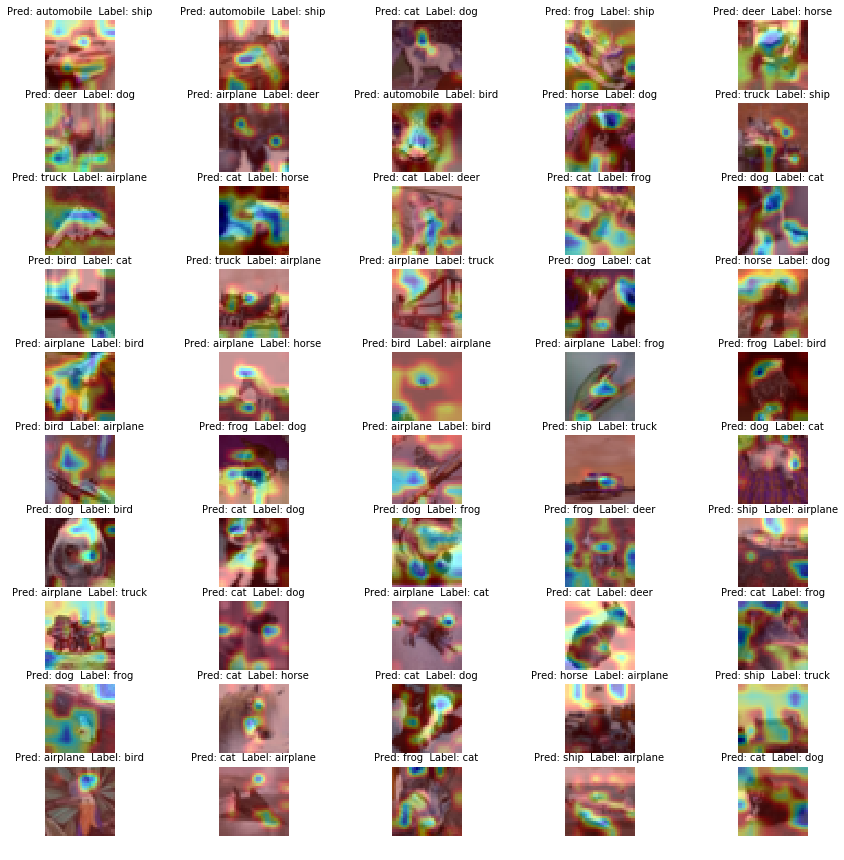

In [146]:
w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 10
val = 0

for i in range(1, columns*rows +1):
  if len(incorrect_index_50) >= i:
    index = incorrect_index_50[val]

    img = test_features[incorrect_index_50[val]]
    preprocess_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
    out = viz(preprocess_img, layer_name="stage1_unit2_conv2", channel_number=64)
    out = out/255
    
    fig.add_subplot(rows, columns, i)
    plt.title('Pred: '+ str(class_names[np.argmax(predicted_results[index])]) + "  Label: " + str(class_names[test_labels[index][0]]), fontsize=10)
    plt.imshow(out)
    plt.axis('off')
    val += 1
  else:
    pass
plt.show()

---